In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.7 0.1 0.2 -- ./training/PlantVillage/


In [2]:
# pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import splitfolders

# input_folder = 'PlantVillage/'

# splitfolders.ratio(input_folder, output = "dataset",
#                    seed = 42, ratio =(.7, .2, .1), 
#                    group_prefix = None)

Copying files: 2152 files [00:29, 74.18 files/s]


In [5]:
IMAGE_SIZE = 256
CHANNELS = 3

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        # save_to_dir="AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [8]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [9]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
dir(train_generator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see

In [7]:
# count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.69803923 0.6666667  0.7176471 ]
  [0.69803923 0.6666667  0.7176471 ]
  [0.7133934  0.68202084 0.73300123]
  ...
  [0.42731953 0.36065286 0.39986855]
  [0.5259903  0.4593236  0.49853933]
  [0.5407813  0.47411466 0.51333034]]

 [[0.6981711  0.66679853 0.7177789 ]
  [0.69813967 0.6667671  0.7177475 ]
  [0.7174416  0.6860691  0.73704946]
  ...
  [0.42741603 0.36074936 0.39996505]
  [0.5268072  0.4601405  0.4993562 ]
  [0.54087555 0.47420892 0.5134246 ]]

 [[0.7019608  0.67058825 0.72156864]
  [0.7019608  0.67058825 0.72156864]
  [0.7251315  0.69375896 0.74473935]
  ...
  [0.43693715 0.3702705  0.40948617]
  [0.34309152 0.27642485 0.31564054]
  [0.37359393 0.30692726 0.34614295]]

 ...

 [[0.69091547 0.6320919  0.65954286]
  [0.70221704 0.6433935  0.6708445 ]
  [0.69030786 0.6314843  0.6589353 ]
  ...
  [0.501377   0.41902402 0.446475  ]
  [0.49023202 0.40787905 0.43533003]
  [0.49012747 0.40777454 0.43522552]]

 [[0.7176471  0.65882355 0.6862745 ]
  [0.71749675 0.65867317 0.6861242 ]


In [11]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 430 images belonging to 3 classes.


In [12]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [13]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5936102  0.5857671  0.6406691 ]
  [0.5892298  0.5813867  0.63628864]
  [0.5848495  0.57700634 0.6319083 ]
  ...
  [0.6766391  0.66879594 0.7236979 ]
  [0.668163   0.66031986 0.7152218 ]
  [0.6635317  0.6556886  0.71059054]]

 [[0.59607846 0.5882353  0.6431373 ]
  [0.59607846 0.5882353  0.6431373 ]
  [0.59607846 0.5882353  0.6431373 ]
  ...
  [0.67499644 0.6671533  0.72205526]
  [0.66706795 0.6592248  0.71412677]
  [0.6629842  0.65514106 0.710043  ]]

 [[0.52535415 0.517511   0.57241297]
  [0.5363052  0.52846205 0.583364  ]
  [0.5472562  0.53941303 0.594315  ]
  ...
  [0.67373914 0.665896   0.72079796]
  [0.6663198  0.65847665 0.7133786 ]
  [0.6633622  0.65551907 0.710421  ]]

 ...

 [[0.62096316 0.60919845 0.6523357 ]
  [0.56710863 0.5553439  0.5984812 ]
  [0.5260703  0.5143056  0.55744284]
  ...
  [0.7721008  0.76817924 0.79170865]
  [0.7642791  0.76035756 0.78388697]
  [0.7615413  0.75761974 0.78114915]]

 [[0.6001562  0.5883915  0.63152874]
  [0.56765616 0.55589145 0.59902877]


## Building the Model

In [14]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
1506/32

47.0625

In [18]:
215/32

6.71875

In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=40,
)

Epoch 1/40
47/47 [==============================] - 151s 3s/step - loss: 0.0762 - accuracy: 0.9749 - val_loss: 0.1003 - val_accuracy: 0.9635
Epoch 2/40
47/47 [==============================] - 146s 3s/step - loss: 0.0469 - accuracy: 0.9817 - val_loss: 0.0275 - val_accuracy: 0.9896
Epoch 3/40
47/47 [==============================] - 144s 3s/step - loss: 0.0476 - accuracy: 0.9830 - val_loss: 0.0713 - val_accuracy: 0.9688
Epoch 4/40
47/47 [==============================] - 145s 3s/step - loss: 0.0807 - accuracy: 0.9749 - val_loss: 0.0583 - val_accuracy: 0.9688
Epoch 5/40
47/47 [==============================] - 141s 3s/step - loss: 0.0460 - accuracy: 0.9830 - val_loss: 0.1039 - val_accuracy: 0.9740
Epoch 6/40
47/47 [==============================] - 143s 3s/step - loss: 0.0602 - accuracy: 0.9722 - val_loss: 0.1336 - val_accuracy: 0.9427
Epoch 7/40
47/47 [==============================] - 153s 3s/step - loss: 0.0715 - accuracy: 0.9681 - val_loss: 0.1191 - val_accuracy: 0.9479
Epoch 8/40
47

In [35]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 7s 1s/step - loss: 0.1583 - accuracy: 0.9630


In [36]:
scores

[0.1583421528339386, 0.9629629850387573]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [37]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [38]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 47}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [40]:
type(history.history['loss'])

list

In [41]:
len(history.history['loss'])

40

In [42]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.07616293430328369,
 0.046884845942258835,
 0.047610316425561905,
 0.08069205284118652,
 0.0459655225276947]

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [44]:
val_acc

[0.9635416865348816,
 0.9895833134651184,
 0.96875,
 0.96875,
 0.9739583134651184,
 0.9427083134651184,
 0.9479166865348816,
 0.9739583134651184,
 0.9739583134651184,
 0.984375,
 1.0,
 0.9895833134651184,
 0.953125,
 0.984375,
 0.9947916865348816,
 0.9947916865348816,
 0.9739583134651184,
 0.9895833134651184,
 0.9895833134651184,
 0.984375,
 0.9895833134651184,
 0.9947916865348816,
 0.9947916865348816,
 0.9947916865348816,
 0.9791666865348816,
 0.9947916865348816,
 0.984375,
 0.9947916865348816,
 0.9895833134651184,
 0.9947916865348816,
 0.9947916865348816,
 0.9791666865348816,
 0.9947916865348816,
 0.9895833134651184,
 0.9947916865348816,
 0.9947916865348816,
 0.9791666865348816,
 0.9895833134651184,
 0.984375,
 0.96875]

In [45]:
acc

[0.9748982191085815,
 0.9816824793815613,
 0.9830393195152283,
 0.9748982191085815,
 0.9830393195152283,
 0.9721845388412476,
 0.9681139588356018,
 0.9864314794540405,
 0.9932157397270203,
 0.9932157397270203,
 0.998643159866333,
 0.9959294199943542,
 0.9918588995933533,
 0.98439621925354,
 0.9891451597213745,
 0.9966078400611877,
 0.9979647397994995,
 0.9932157397270203,
 0.9945725798606873,
 0.989823579788208,
 0.9966078400611877,
 1.0,
 1.0,
 1.0,
 0.9938941597938538,
 0.9980053305625916,
 1.0,
 0.9993215799331665,
 0.9938941597938538,
 0.9938941597938538,
 0.9993215799331665,
 0.9959294199943542,
 0.9952509999275208,
 0.9959294199943542,
 0.9925373196601868,
 1.0,
 0.9925373196601868,
 0.9491180181503296,
 0.989823579788208,
 0.9891451597213745]

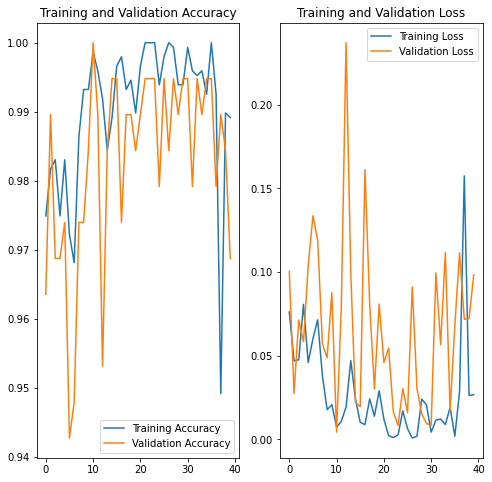

In [47]:
EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


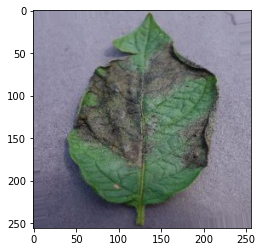

In [49]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

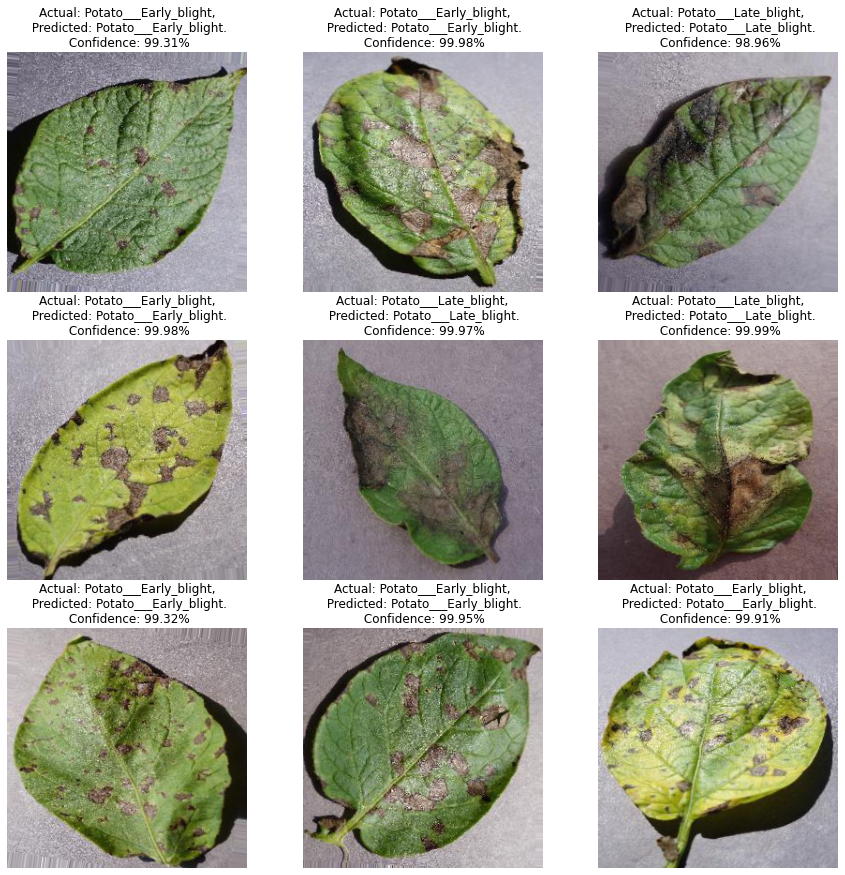

In [51]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [52]:
model.save("../potatoes1.h5")